In [20]:
!nvidia-smi

isLocalServer = False
sys_path_to_be_added = '/notebook/personal/ksuchoi216/FaceID-model/'
config_path = './configs/config.json'

%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import os

def checkLocalServer(isLocalServer, sys_path_to_be_added=None):
    print(f'isLocalServer is {isLocalServer}')
    if isLocalServer is True:
        if sys_path_to_be_added not in sys.path:
            sys.path.insert(0, sys_path_to_be_added)
            os.chdir(sys_path_to_be_added)

        # print("System path as follows:")
        # for path in sys.path:
        #     print(f"{path}")

checkLocalServer(isLocalServer, sys_path_to_be_added)

from utils import Config_Manager
cfgm = Config_Manager(config_path)
cfg = cfgm.get_cfg()
!pwd

zsh:1: command not found: nvidia-smi
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
isLocalServer is False
/Volumes/ssd/code/FaceID_model_rebuild


In [59]:
import torch.nn as nn
import torch.optim as optim
from model import build_model, load_dataloader
dataloader_train = load_dataloader('train')
dataloader_val = load_dataloader('val')
dataloader_test = load_dataloader('test')

model = build_model(cfg["model"])
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

from model import train_model
model, train_res_mat = train_model(model,
                         loss_fn,
                         optimizer,
                         scheduler,
                         dataloader_train,
                         num_epochs=10
                         )

Epoch 0/9
train Loss: 1.3847 Acc: 0.4373 recall: 0.4579 Precision: 0.2322 avg_prob: 0.2590
----------------------------------------------------------------------------------------------------
Epoch 1/9
train Loss: 1.3815 Acc: 0.4731 recall: 0.4917 Precision: 0.2824 avg_prob: 0.2599
----------------------------------------------------------------------------------------------------
Epoch 2/9
train Loss: 1.3782 Acc: 0.5376 recall: 0.5536 Precision: 0.7673 avg_prob: 0.2608
----------------------------------------------------------------------------------------------------
Epoch 3/9
train Loss: 1.3750 Acc: 0.7061 recall: 0.7156 Precision: 0.8476 avg_prob: 0.2626
----------------------------------------------------------------------------------------------------
Epoch 4/9
train Loss: 1.3716 Acc: 0.8817 recall: 0.8839 Precision: 0.9207 avg_prob: 0.2653
----------------------------------------------------------------------------------------------------
Epoch 5/9
train Loss: 1.3681 Acc: 0.9427

tensor([[1.3847, 0.4373, 0.4579, 0.2322],
        [1.3815, 0.4731, 0.4917, 0.2824],
        [1.3782, 0.5376, 0.5536, 0.7673],
        [1.3750, 0.7061, 0.7156, 0.8476],
        [1.3716, 0.8817, 0.8839, 0.9207],
        [1.3681, 0.9427, 0.9427, 0.9556],
        [1.3647, 0.9570, 0.9565, 0.9651],
        [1.3627, 0.9606, 0.9601, 0.9676],
        [1.3623, 0.9642, 0.9637, 0.9702],
        [1.3620, 0.9677, 0.9673, 0.9729]])
10 4
0


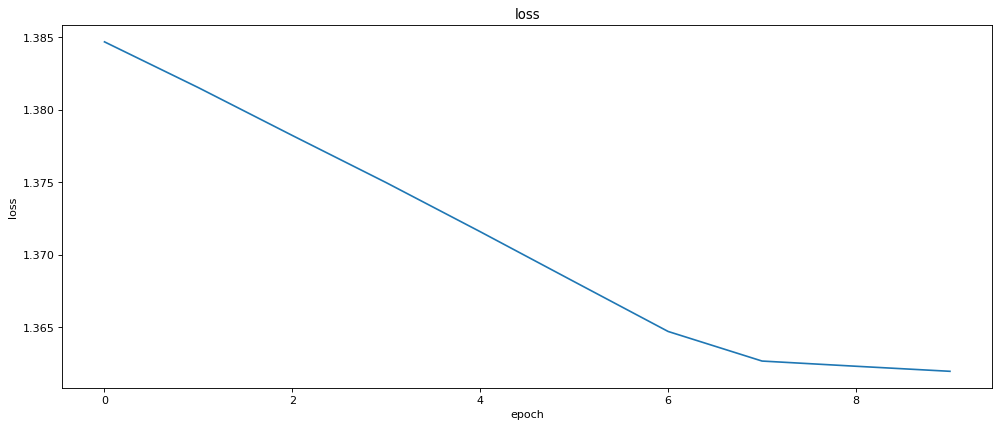

1


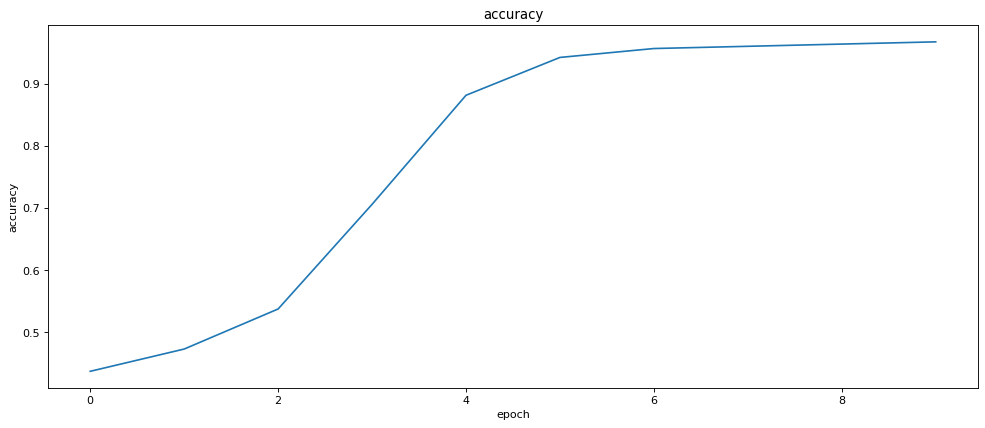

2


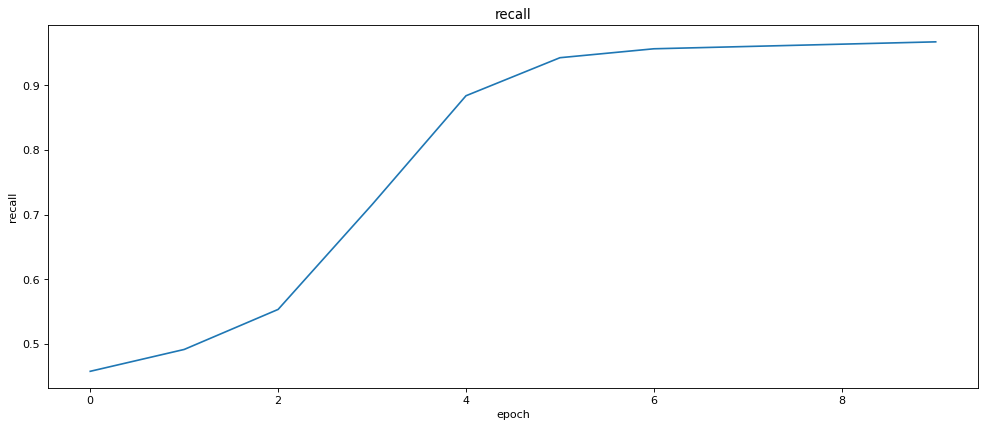

3


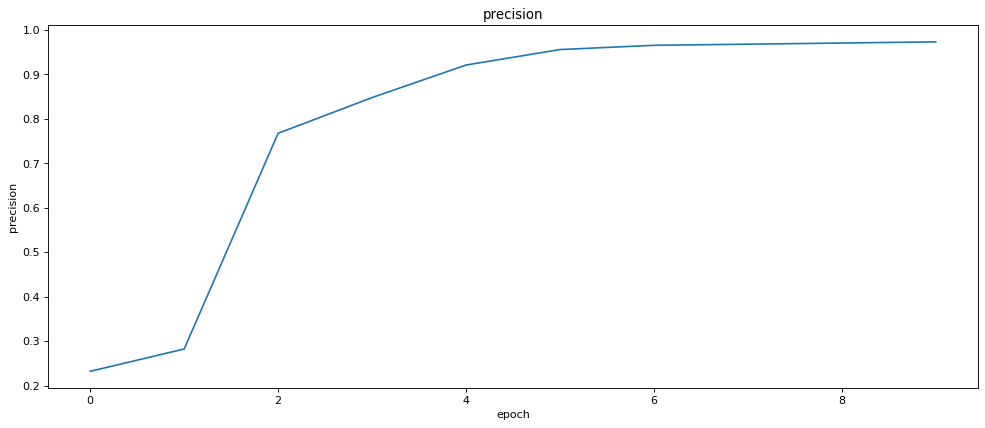

In [60]:
import matplotlib.pyplot as plt
train_evaluation_numpy = train_res_mat
print(train_evaluation_numpy)

num_epochs, num_evaluations = train_evaluation_numpy.shape
print(num_epochs, num_evaluations)


title_list = ['loss', 'accuracy', 'recall', 'precision']
for col, title in zip(range(0, num_evaluations), title_list):
  plt.figure(figsize=(15, 6), dpi=80)
  plt.title(title)
  plt.ylabel(title)
  plt.xlabel('epoch')
  print(col)
  plt.plot(range(0, num_epochs), train_evaluation_numpy[:, col])
  plt.show()